In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro,  poisson, chisquare, expon, kstest
from scipy import stats


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/archivo_casi_listo.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe


# Ejercicios estadística inferencial

1. Igual que en los ejercicios de la clase invertida, evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson.

- ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson? 

    --> Distribución exponencial (tiempo entre eventos)

- ¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?

    --> Distribución de Poisson (número de sucesos, errores, en un intervalo concreto, artículo de noticias)

- ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?

    --> Distribución exponencial (tiempo entre eventos)

- ¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?

    --> Distribución de Poisson (número de sucesos, accidentes, en un intervalo concreto, una hora)

- ¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?

    --> Distribución exponencial (tiempo entre eventos)

- ¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?

    --> Distribución de Poisson

- ¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?

    --> Distribución exponencial

- ¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?

    --> Distribución de Poisson

- ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?

    --> Distribución exponencial

- ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?

    --> Distribución de Poisson

2. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.
- Intervalo de Confianza para la Esperanza de Vida
    
    Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.
    
    Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [3]:
df["lifeexpectancy"].value_counts().sort_index()

lifeexpectancy
52.8    1
53.7    1
54.0    1
54.3    2
57.1    1
       ..
83.1    1
83.3    1
83.6    1
84.2    1
85.4    1
Name: count, Length: 134, dtype: int64

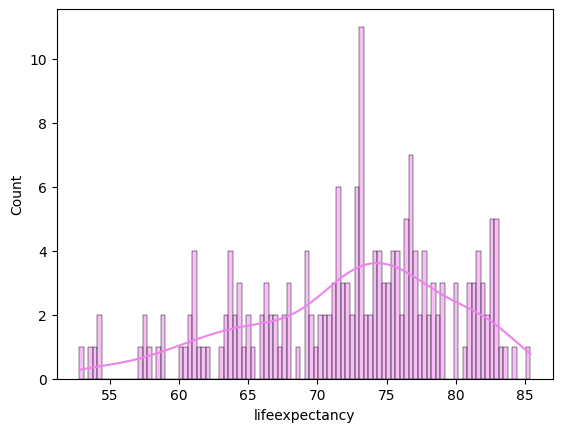

In [4]:
sns.histplot(df["lifeexpectancy"], color = "violet", kde = True, bins = 100 );	

In [5]:
diccionario = {}
for continente in df["continent"].unique():
    diccionario[continente] = df[df["continent"] == continente]

In [6]:
diccionario["Europe"].head(4)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,62.45,16.3,NaN,NaN,67873.0,42.506285,1.521801,Europe
9,Austria,109.0,AT,32.4,83871.0,21000.0,9.70,43.0,Vienna,61448.0,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,8877067.0,60.70,25.4,51.4,4.67,5194416.0,47.516231,14.550072,Europe
15,Belarus,47.0,BY,42.0,207600.0,155000.0,9.90,375.0,Minsk,58280.0,NaN,5.6,BYN,1.45,42.6,0.60,6.308046e+10,100.5,87.4,2.6,Minsk,74.2,2.0,1.49,Russian,34.5,5.19,9466856.0,64.10,14.7,53.3,4.59,7482982.0,53.709807,27.953389,Europe


In [51]:
# ORIGINAL
# def intervalo(df, nombre_columna, nivel_confianza):
#     media = df[nombre_columna].dropna().mean()
#     error = stats.sem(df[nombre_columna].dropna())
#     grados_libertad = len(df[nombre_columna].dropna())-1
#     valor_critico = stats.t.ppf((1+nivel_confianza)/2, df = grados_libertad)

#     limite_inferior = media - valor_critico * error
#     limite_superior = media + valor_critico * error

#     print("Intervalo de Confianza para el gdp:")
#     print(f"Media Muestral: {np.round(media, 2)}")
#     print(f"Error Estándar: {np.round(error, 2)}")
#     print(f"Nivel de Confianza: {nivel_confianza}")
#     print(f"Valor Crítico: {np.round(valor_critico, 2)}")
#     print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

In [7]:
def intervalo(df, nombre_columna, nivel_confianza):
    media = df[nombre_columna].dropna().mean()
    error = stats.sem(df.dropna()[nombre_columna])
    grados_libertad = len(df[nombre_columna].dropna())-1
    valor_critico = stats.t.ppf((1+nivel_confianza)/2, df = grados_libertad)

    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error

    print("Intervalo de Confianza de la variable:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

In [8]:
for k, v in diccionario.items():
    print(k)
    intervalo(diccionario[k], "lifeexpectancy", 0.95)
    print("-------------------")

Asia
Intervalo de Confianza de la variable:
Media Muestral: 73.99
Error Estándar: 0.77
Nivel de Confianza: 0.95
Valor Crítico: 2.01
Intervalo de Confianza: (72.44, 75.53)
-------------------
Europe
Intervalo de Confianza de la variable:
Media Muestral: 78.79
Error Estándar: 0.66
Nivel de Confianza: 0.95
Valor Crítico: 2.02
Intervalo de Confianza: (77.46, 80.12)
-------------------
Africa
Intervalo de Confianza de la variable:
Media Muestral: 63.9
Error Estándar: 1.05
Nivel de Confianza: 0.95
Valor Crítico: 2.01
Intervalo de Confianza: (61.8, 66.01)
-------------------
North America
Intervalo de Confianza de la variable:
Media Muestral: 75.11
Error Estándar: 1.02
Nivel de Confianza: 0.95
Valor Crítico: 2.07
Intervalo de Confianza: (72.99, 77.24)
-------------------
South America
Intervalo de Confianza de la variable:
Media Muestral: 74.93
Error Estándar: 0.93
Nivel de Confianza: 0.95
Valor Crítico: 2.2
Intervalo de Confianza: (72.88, 76.98)
-------------------
Oceania
Intervalo de Confi

- Intervalo de Confianza para el PIB
    
    Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [9]:
media_gdp = df.groupby("continent")["gdp"].mean()
df_gdp_continente = pd.DataFrame(media_gdp).reset_index()
df_gdp_continente

,continent,gdp
0,Africa,4.608056e+10
1,Asia,8.007087e+11
2,Europe,5.021790e+11
3,North America,1.085123e+12
4,Oceania,1.167886e+11
5,South America,3.212948e+11
6,Unknown,4.290166e+08


In [10]:
for k, v in diccionario.items():
    print(k)
    intervalo(diccionario[k], "gdp", 0.95)
    print("-------------------")

Asia
Intervalo de Confianza de la variable:
Media Muestral: 800708749798.85
Error Estándar: 579115051143.29
Nivel de Confianza: 0.95
Valor Crítico: 2.01
Intervalo de Confianza: (-364989385816.27, 1966406885413.98)
-------------------
Europe
Intervalo de Confianza de la variable:
Media Muestral: 502179004699.7
Error Estándar: 188568332164.85
Nivel de Confianza: 0.95
Valor Crítico: 2.02
Intervalo de Confianza: (121632704905.92, 882725304493.48)
-------------------
Africa
Intervalo de Confianza de la variable:
Media Muestral: 46080559143.87
Error Estándar: 12496561265.2
Nivel de Confianza: 0.95
Valor Crítico: 2.01
Intervalo de Confianza: (21004374431.28, 71156743856.46)
-------------------
North America
Intervalo de Confianza de la variable:
Media Muestral: 1085122799409.39
Error Estándar: 1330998311659.73
Nivel de Confianza: 0.95
Valor Crítico: 2.07
Intervalo de Confianza: (-1675198752567.44, 3845444351386.22)
-------------------
South America
Intervalo de Confianza de la variable:
Media

- Intervalo de Confianza para la Tasa de Natalidad
    
    Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.

In [11]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')

In [12]:
intervalo(diccionario["Asia"], "fertilityrate", 0.99)
print("-------------------")

Intervalo de Confianza de la variable:
Media Muestral: 2.35
Error Estándar: 0.13
Nivel de Confianza: 0.99
Valor Crítico: 2.68
Intervalo de Confianza: (2.0, 2.7)
-------------------


- Intervalo de Confianza para la Tasa de Desempleo
    
    Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.


In [13]:
diccionario["Oceania"]

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
8,Australia,3.0,AU,48.2,7741220.0,58000.0,12.60,61.0,Canberra,375908.0,119.80,1.6,AUD,1.740,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,Unknown,19.6,3.68,25766605.0,65.50,23.0,47.4,5.27,21844756.0,-25.274398,133.775136,Oceania
58,Fiji,49.0,FJ,23.3,18274.0,4000.0,21.28,679.0,Suva,2046.0,132.30,1.8,FJD,2.770,55.9,0.82,5.535549e+09,106.4,16.1,21.6,Suva,67.3,34.0,1.28,Fiji Hindi,21.4,0.84,889953.0,57.60,24.2,32.1,4.10,505048.0,-17.713371,178.065032,Oceania
89,Kiribati,147.0,KI,42.0,811.0,NaN,27.89,686.0,South Tarawa,66.0,99.55,0.6,AUD,3.570,15.0,0.98,1.946472e+08,101.3,31.2,41.2,South Tarawa,68.1,92.0,NaN,English,0.2,0.20,117606.0,62.45,22.0,32.7,NaN,64489.0,1.836898,-157.376832,Oceania
107,Marshall Islands,329.0,MH,63.9,181.0,NaN,29.03,692.0,Majuro,143.0,NaN,NaN,USD,4.050,70.2,1.44,2.212780e+08,84.7,23.7,27.4,Majuro,65.2,NaN,2.00,Marshallese,10.0,0.42,58791.0,62.45,17.8,65.9,NaN,45514.0,7.131474,171.184478,Oceania
111,Federated States of Micronesia,784.0,FM,31.4,702.0,NaN,22.82,691.0,Palikir,143.0,112.10,0.5,USD,3.050,91.9,0.98,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113815.0,62.45,25.2,60.5,NaN,25963.0,7.425554,150.550812,Oceania
120,Nauru,541.0,NR,39.6,21.0,NaN,17.95,674.0,Yaren District,NaN,NaN,NaN,AUD,2.245,32.0,0.98,1.330000e+08,NaN,31.2,NaN,Unknown,73.2,NaN,NaN,English,30.7,NaN,10084.0,62.45,16.3,NaN,NaN,NaN,-0.522778,166.931503,Oceania
123,New Zealand,18.0,NZ,40.5,268838.0,9000.0,11.98,64.0,Wellington,34382.0,114.24,1.6,NZD,1.710,38.6,1.40,2.069288e+11,100.0,82.0,4.7,Auckland,81.9,9.0,11.49,English,12.6,3.59,4841000.0,69.90,29.0,34.6,4.07,4258860.0,-40.900557,174.885971,Oceania
132,Palau,39.0,PW,10.9,459.0,NaN,14.00,680.0,Ngerulmud,224.0,118.17,1.3,USD,2.210,87.6,0.98,2.839949e+08,112.6,54.7,16.6,Koror,69.1,NaN,3.00,English,21.8,1.18,18233.0,62.45,21.3,76.6,NaN,14491.0,7.514980,134.582520,Oceania
135,Papua New Guinea,20.0,PG,2.6,462840.0,4000.0,27.07,675.0,Port Moresby,7536.0,155.99,3.6,PGK,3.560,74.1,1.36,2.496961e+10,108.5,1.8,38.0,Port Moresby,64.3,145.0,1.16,Tok Pisin,5.8,0.07,8776109.0,47.20,13.6,37.1,2.46,1162834.0,-6.314993,143.955550,Oceania
148,Samoa,70.0,WS,12.4,2831.0,NaN,24.38,685.0,Apia,246.0,117.56,1.0,WST,3.880,60.4,0.91,8.506550e+08,110.5,7.6,13.6,Apia,73.2,43.0,0.78,Samoan,11.5,0.34,202506.0,43.70,25.5,19.3,8.36,35588.0,-13.759029,-172.104629,Oceania


In [14]:
intervalo(diccionario["Oceania"], "unemploymentrate", 0.95)
print("-------------------")

Intervalo de Confianza de la variable:
Media Muestral: 3.79
Error Estándar: 0.58
Nivel de Confianza: 0.95
Valor Crítico: 2.36
Intervalo de Confianza: (2.43, 5.16)
-------------------


- Intervalo de Confianza para la Tasa de Impuestos
    
    Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [15]:
intervalo(diccionario["Africa"], "totaltaxrate", 0.90)
print("-------------------")

Intervalo de Confianza de la variable:
Media Muestral: 47.77
Error Estándar: 2.35
Nivel de Confianza: 0.9
Valor Crítico: 1.68
Intervalo de Confianza: (43.83, 51.71)
-------------------


3. Ejercicios prueba de hipótesis: Hasta ahora en la lección y en los ejercicios de la clase invertida os hemos propuesto un contexto y unas hipótesis para entender que es la prueba de hipótesis. Ahora es tu turno, tienes que pensar en 2 hipótesis que quieras aceptar o rechazar usando una prueba de hipótesis en base a los datos que tenemos.

## H0: No hay diferencia en el salario mínimo promedio entre los países con una fertilidad alta y los que no
## H1: Sí hay diferencia
## Prueba de hipótesis: Realizamos una prueba t de Student para comparar la tasa de desempleo promedio de ambos grupos.

--> Consideramos una tasa de fertilidad alta la que está por encima del Q3: 3.565

In [38]:
q3 = np.percentile(df["fertilityrate"], 75)
q3

3.565

In [33]:
df[["fertilityrate", "minimumwage", "country"]]

,fertilityrate,minimumwage,country
0,4.47,0.43,Afghanistan
1,1.62,1.12,Albania
2,3.02,0.95,Algeria
3,1.27,6.63,Andorra
4,5.52,0.71,Angola
...,...,...,...
190,2.27,0.01,Venezuela
191,2.05,0.73,Vietnam
192,3.79,NaN,Yemen
193,4.63,0.24,Zambia


In [69]:
df[["fertilityrate", "minimumwage", "country"]].sort_values(["minimumwage"], ascending=False).head()

,fertilityrate,minimumwage,country
8,1.740,13.59,Australia
100,1.370,13.05,Luxembourg
113,2.245,11.72,Monaco
123,1.710,11.49,New Zealand
60,1.880,11.16,France


In [81]:
# vamos a definir una función para poder hacer el t-test de Student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]

    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05
    print(f"El p_valor es: {p_valor}")
    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en el salario mínimo promedio entre los dos grupos.")
        
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en el salario mínimo promedio entre los dos grupos.")

In [82]:
df_copy = df

In [83]:
# filtramos los datos para obtener dos grupos: fertilidad superior o igual al Q3 (alta) y normal el resto.
grupo_fertilidad_alta = df_copy[df_copy['fertilityrate'] >= q3].dropna()["minimumwage"]
grupo_fertilidad_normal = df_copy[df_copy['fertilityrate'] < q3].dropna()["minimumwage"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_fertilidad_alta, grupo_fertilidad_normal)

El p_valor es: 2.333426024746323e-10
Rechazamos la hipótesis nula.
Hay una diferencia significativa en el salario mínimo promedio entre los dos grupos.


Eliminando los valores negativos, los datos nos muestran que puede haber una diferencia significativa grande en el salario mínimo de países con una tasa de fertilidad alta y los que no la tienen alta. A mayor tasa de fertilidad parece haber un menor salario mínimo y viceversa, a menor tasa de fertilidad mayor es el salario mínimo.

## H0: No hay diferencia entre la tasa de desempleo promedio entre los países con una población urbana alta y los que no
## H1: Sí hay diferencia
## Prueba de hipótesis: Realizamos una prueba t de Student para comparar la tasa de desempleo promedio de ambos grupos.
--> Consideramos una población urbana alta la que está por encima de la mediana y baja al resto

In [89]:
df[["urban_population"]].describe()

,urban_population
count,1.900000e+02
mean,2.230454e+07
std,7.543050e+07
min,5.464000e+03
25%,1.152961e+06
50%,4.678104e+06
75%,1.490324e+07
max,8.429340e+08


In [97]:
# vamos a definir una función para poder hacer el t-test de Student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]

    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05
    print(f"El p_valor es: {p_valor}")
    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en la tasa de desempleo promedio entre los dos grupos.")
        
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo promedio entre los dos grupos.")

In [98]:
# filtramos los datos para obtener dos grupos: 
grupo_poblacion_urbana_alta = df_copy[df_copy["urban_population"] >= df["urban_population"].median()].dropna()["unemploymentrate"]
grupo_poblacion_urbana_baja = df_copy[df_copy['urban_population'] < df["urban_population"].median()].dropna()["unemploymentrate"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_poblacion_urbana_alta, grupo_poblacion_urbana_baja)

El p_valor es: 0.31819240471361027
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo promedio entre los dos grupos.


No vemos evidencia para afirmar una diferencia significativa en la tasa de desempleo entre paises con una alta población urbana y los que no.